# SIT742: Modern Data Science 
**(2020 Assessment Task 02: Exploration FIFA2019 Data)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.

Prepared by **SIT742 Teaching Team**


---

<div class="alert alert-block alert-info">
Enter your information in the following cell. Please make sure you fill your Student ID and Name correctly.  
</div>

**Student Group Information:** Please fill your information below

- Names with Student IDs:  Muhammad Akbar Husnoo [219306444],
Keerthana Muhunthan [219499597], Alec Farrell [220003003]
- Group ID:  SIT742T2EGroup 15
- Emails: mahusnoo@deakin.edu.au, kmuhunthan@deakin.edu.au, arfarell@deakin.edu.au

---

## Overview

Recently, [Kaggle](https://www.kaggle.com) (a data science community and competition platform) released one data set '[FIFA19](https://www.kaggle.com/karangadiya/fifa19)‘, which consists of 18K+ FIFA 19 player with around 90 attributes extracted from FIFA database. In this assessment task, we make it available as the data set:
- [2020T2Data.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/2020T2Data.csv): The data set for this assignment task.

In this task, you will need to **use Spark packages**

- **Part 1**: Exploratory Data Analysis

- **Part 2**: Clustering Analysis, and identify the position profiles of each cluster

- **Part 3**: Classification Analysis, and evaluate the performance of different algorithms using cross validation;


You will be required to complete the coding to answer the questions with a neat and clean format, and your commenting and adherence to code standards will be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/ 


**Note**: You are not necessary to stick to the partial code provided, and you can write your own complete code to implement the required tasks. But you should provide sufficient comments.



## Part 1 - What we could know about FIFA 2019 Players? 

### 1.0. Libraries and data files
<a id="Load data"></a>
***

Import the necessary Spark environment, and load the data set [2020T2Data.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/2020T2Data.csv).


In [0]:
!pip install wget
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
!tar xf spark-2.4.0-bin-hadoop2.7.tgz
!pip install -q findspark
import os,wget
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.0-bin-hadoop2.7"


link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/2020T2Data.csv'
DataSet = wget.download(link_to_data)

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=332320b575202b6973f0d154627d21461591bcf2f62fd69b5c64699d13ac694b
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
import findspark
import logging #import added for log messages integration of error handling
findspark.init()
from pyspark.sql import SparkSession

### 1.1 Data Exploration

*Remind: You must only use **PySpark** to complete the following data processing and model building. Otherwise, you lose all marks.*

<a id="loading"></a>
***

<div class="alert alert-block alert-info">

**Code**: 
    import the csv file as a Spark dataframe and name it as df

</div>



In [0]:
#Creating a Spark Session of name SIT742T2
spark = SparkSession.builder.appName('SIT742T2').getOrCreate()

#try-except block for error handling to prevent abnormal termination of code
try:
  #read and upload csv file as well as converting file into Spark dataframe
  df = spark.read.load("2020T2Data.csv", format="csv", inferSchema="true", header="true")
  #check and print df variabe type
  print('df is of type = ' + str(type(df)))
  #display df
  print('\nSpark Dataframe is as shown below:\n')
  df.show()
except Exception as e:
  logging.error(e)

df is of type = <class 'pyspark.sql.dataframe.DataFrame'>

Spark Dataframe is as shown below:

+------+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+--------+-------+-------+--------------+------------------------+---------+-----------+--------------+----------+---------+--------+-------------+------------+-----------+--------------------+------+----------+------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+--------+----------+---------+-------------+----------+-----------------+
|    ID|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo|value(M)|wage

****


<div class="alert alert-block alert-info">

**Code**: 
    Check statistics (min, mean and max) for features on Age, Overall. Then find out the Avg Overall on Position, Avg Overall on Nationality (Sort by avg Overall on Nationality)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.1.A** Please answer questions with proper section title  '1.1.A':     
    <ol>
        <li> Which are the (min, mean and max) for Age </li>
        <li> Which are the (min, mean and max) for Overall </li>
        <li> Find the position having highest Avg Overall (sort Avg Overall by position) </li>
        <li> Find the top 3 countries with highest Avg Overall (sort Avg Overall by countries)  </li>
    </ol>
</div>
</div>

In [0]:
from pyspark.sql import functions as F

#Descriptive statistics for Age

#Create a function that accepts dataframe values and variable name as parameters for computing max, min and median
def descriptive_summary_measures(dataframe_values, variable_name):
  #try-except block for error handling to prevent abnormal termination of code
  try:
    print('Descriptive Summary Measures for ' + variable_name +':\n')
    #use aggregation for computation
    #computation of min for values
    print ('Minimum Value of ' + variable_name + ':')
    df.agg(F.min(dataframe_values)).show()
    #computation of max for values
    print ('Maximum Value of ' + variable_name + ':')
    df.agg(F.max(dataframe_values)).show()
    #computation of mean for values
    print ('Mean Value of ' + variable_name + ':')
    df.agg(F.mean(dataframe_values)).show()
  
  except Exception as e:
    logging.error(e)

#Call function that accepts age column and variable name age as argument
descriptive_summary_measures(df['Age'], 'Age')

Descriptive Summary Measures for Age:

Minimum Value of Age:
+--------+
|min(Age)|
+--------+
|      16|
+--------+

Maximum Value of Age:
+--------+
|max(Age)|
+--------+
|      45|
+--------+

Mean Value of Age:
+------------------+
|          avg(Age)|
+------------------+
|25.122205745043114|
+------------------+



In [0]:
#Descriptive statistics for Overall

#Function Reuse for computation of Min, Max and Median
#Calling function created above with Overall column and variable name Overall as argument
descriptive_summary_measures(df['Overall'], 'Overall')

Descriptive Summary Measures for Overall:

Minimum Value of Overall:
+------------+
|min(Overall)|
+------------+
|          46|
+------------+

Maximum Value of Overall:
+------------+
|max(Overall)|
+------------+
|          94|
+------------+

Mean Value of Overall:
+-----------------+
|     avg(Overall)|
+-----------------+
|66.23869940132916|
+-----------------+



In [0]:
#Position having highest Avg Overall (sort Avg Overall by position)

#Create a function that accepts variable names and n as parameters for order by
def order_by (target_variable, order_variable, sort_variable, n):
  #try-except block for error handling to prevent abnormal termination of code
  try:
    #order target_variable by order_variable
    df.groupBy(target_variable).agg(F.mean(order_variable)).sort(sort_variable, ascending = [0]).show(n)
  except Exception as e:
    logging.error(e)

#Call function that accepts Position column, Overall column and n = 1 as argument
print('Position having the highest Average Overall by Position:\n')
order_by('Position', 'Overall', 'avg(Overall)', 1)

Position having the highest Average Overall by Position:

+--------+-----------------+
|Position|     avg(Overall)|
+--------+-----------------+
|      LF|73.86666666666666|
+--------+-----------------+
only showing top 1 row



In [0]:
#Top 3 countries with highest Avg Overall

#Function Reuse for computation of top 3 countries with highest Avg Overall
#Calling function created above with Overall, and Nationality Column and n = 3
print('Top 3 Countries with the Highest Average Overall:\n')
order_by('Nationality', 'Overall', 'avg(Overall)', 3)

Top 3 Countries with the Highest Average Overall:

+--------------------+-----------------+
|         Nationality|     avg(Overall)|
+--------------------+-----------------+
|United Arab Emirates|             77.0|
|Central African Rep.|73.33333333333333|
|              Israel|72.14285714285714|
+--------------------+-----------------+
only showing top 3 rows



****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to find out the Avg Potentials on Country by Positions, and show the top 10 by ordering your results on Country with alphabet? (Hint: you may need to use pivot)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.1.B** Please answer questions with proper section title  '1.1.B':     
    <ol>
        <li> Show the results on Avg Potentials on Country by Position with ordering the results on country by alphabet</li>
        <li> Find position having highest Avg Potential for Australia </li>
    </ol>
    
</div>
</div>

In [0]:
#Average Potentials on Country by Position with ordering the results on country by alphabet (show top 10)

#try-except block for error handling to prevent abnormal termination of code
try:
  #use aggregation and group by to find required values and sort by Nationality in Alphabetical order
  #then show first 10 results
  print('Average Potentials on Country By Position (Sort Country by alphabetical order): \n')
  df.groupBy('Nationality').pivot('Position').agg(F.mean('Potential')).sort('Nationality').show(10)

except Exception as e:
  logging.error(e)

Average Potentials on Country By Position (Sort Country by alphabetical order): 



ERROR:root:name 'F' is not defined


In [0]:
#Position having highest Avg Potential for Australia

#Filter Dataframe using Nationality Column where value is Australia
#Then show Highest Average Potentials (first 10) in Australia
#try-except block for error handling to prevent abnormal termination of code
try:
  #apply filtering
  df_australia = df[df['Nationality'] == 'Australia']
  print('Dataset containing records of Australia only: \n')
  #show filtered dataset
  df_australia.show()
  #group by position, then aggregate on mean to show highest Avg Potential for Australia only
  print('\nPosition having the highest Avg Potential for Australia Only:\n')
  df_australia.groupBy('Position').agg(F.mean('Potential')).sort('avg(Potential)', ascending = [0]).show(1)

except Exception as e:
  logging.error(e)

Dataset containing records of Australia only: 

+------+-------------+---+--------------------+-----------+--------------------+-------+---------+--------------------+--------------------+--------+-------+-------+--------------+------------------------+---------+-----------+--------------+---------+---------+--------+-------------+------------+-----------+--------------------+------+----------+------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+--------+----------+---------+-------------+----------+-----------------+
|    ID|         Name|Age|               Photo|Nationality|                Flag|Overall|Potential|                Club|           Club Logo|value(M)|wage(K)|Special|Preferred Foot|International Reputation|We

Interesting, is there a age that the player is fully released his potential? If there is, could you find out?

****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to plot the finding visually by having Age as the x-axis and avg potential on age with avg overall on age at y-axis. (Hint: you may need to select and aggregate on data first and then turn it into pandas for plotting)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.1.C** Please include the following plot into your report with proper section title  '1.1.C':     
    <ol>
        <li> Plot the finding visually by having Age as the x-axis; the avg potential on age and the avg overall on age at y-axis. </li>
        <li> Find the age when the players are fully released their potential in general?
    </ol>
    
</div>
</div>

In [0]:
#import required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#try-except block for error handling to prevent abnormal termination of code
try:
  #finding the average potential by age
  df_avg_potential_by_age = df.groupBy('Age').agg(F.mean('Potential')).sort('Age').toPandas()
  print('The Average Potential by Age:\n\n' + str(df_avg_potential_by_age))
  #finding the average overall by age
  df_avg_overall_by_age = df.groupBy('Age').agg(F.mean('Overall')).sort('Age').toPandas()
  print('\n\nThe Average Overall by Age:\n\n' + str(df_avg_overall_by_age))

except Exception as e:
  logging.error(e)

The Average Potential by Age:

    Age  avg(Potential)
0    16       73.190476
1    17       74.339100
2    18       73.530055
3    19       73.146484
4    20       73.213710
5    21       72.957836
6    22       72.819403
7    23       72.555556
8    24       72.079529
9    25       71.290371
10   26       70.176640
11   27       69.709122
12   28       69.444142
13   29       69.357664
14   30       69.700109
15   31       69.850071
16   32       69.529617
17   33       69.558824
18   34       69.539604
19   35       68.132653
20   36       67.937008
21   37       68.939024
22   38       67.378378
23   39       67.640000
24   40       67.692308
25   41       67.600000
26   42       65.000000
27   44       50.500000
28   45       71.000000


The Average Overall by Age:

    Age  avg(Overall)
0    16     54.452381
1    17     56.404844
2    18     57.741803
3    19     59.583008
4    20     61.858871
5    21     63.480675
6    22     64.994030
7    23     66.244745
8    24     67.30633

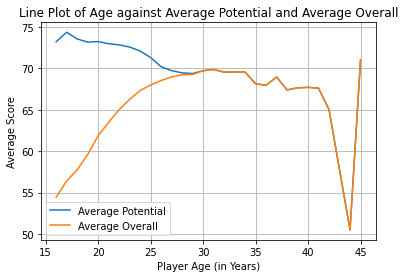

<Figure size 720x360 with 0 Axes>

In [0]:
#Plot Age on X-axis vs Average Potential and Average Overall

#try-except block for error handling to prevent abnormal termination of code
try:
  #prepare data per axis for avg potential by age
  age_pot = df_avg_potential_by_age["Age"]
  average_potential = df_avg_potential_by_age["avg(Potential)"]
  #prepare data per axis for avg overall by age
  age_ov = df_avg_overall_by_age["Age"]
  average_overall = df_avg_overall_by_age["avg(Overall)"]
  #include plot title
  plt.title('Line Plot of Age against Average Potential and Average Overall')
  #include x-axis label
  plt.xlabel('Player Age (in Years)')
  #include y-axis label
  plt.ylabel('Average Score')
  #plot lines for average potential and average overall
  plt.plot(age_pot, average_potential, label = "Average Potential")
  plt.plot(age_ov, average_overall, label = "Average Overall")
  #include legend
  plt.legend()
  #include grid Lines
  plt.grid(b=True, which='major', linestyle='-')
  #change plot size
  plt.figure(figsize=(10,5))
  # Generate Plot
  plt.show()
except Exception as e:
  logging.error(e)

In [0]:
#Find the Intersect (When, on average, players fully realise their potential)
'''
Referenced from https://stackoverflow.com/questions/41247600/subset-pandas-dataframe-by-overlap-with-another
'''
#try-except block for error handling to prevent abnormal termination of code
try:
  #Merges the data frames, and only shows when the Overall and Potential line up.
  Potential_Realised = (df_avg_overall_by_age[df_avg_overall_by_age["avg(Overall)"].isin(df_avg_potential_by_age["avg(Potential)"])])

  #Prints all ages where they are merged
  print(Potential_Realised)
  #Prints the first age they merge
  print("")
  print("Age where players fully released their potential in general\n")
  print(Potential_Realised.iloc[[0]])

except Exception as e:
  logging.error(e)

    Age  avg(Overall)
15   31     69.850071
16   32     69.529617
17   33     69.558824
18   34     69.539604
19   35     68.132653
20   36     67.937008
21   37     68.939024
22   38     67.378378
23   39     67.640000
24   40     67.692308
25   41     67.600000
26   42     65.000000
27   44     50.500000
28   45     71.000000

Age where players fully released their potential in general

    Age  avg(Overall)
15   31     69.850071


## Part 2 - Unsupervised Learning: Kmeans

<a id="kmeans"></a>
***

In this part, you are required to build a Kmeans clustering for exploring the player segmentation. 


### 2.1 Data Preparation

*Remind: You must only use **pyspark** to complete the following data processing and model building. Otherwise, you lose all marks.*


****

<div class="alert alert-block alert-info">

**Code**: 
    You will need to remove the Goal Keepers (Position = 'GK') and use the position attribute, ID attribute (for later processing) and skill-set attributes (Height(CM),
Weight(KG),
Crossing,
Finishing,
HeadingAccuracy,
ShortPassing,
Volleys,
Dribbling,
Curve,
FKAccuracy,
LongPassing,
BallControl,
Acceleration,
SprintSpeed,
Agility,
Reactions,
Balance,
ShotPower,
Jumping,
Stamina,
Strength,
LongShots,
Aggression,
Interceptions,
Positioning,
Vision,
Penalties,
Composure,
Marking,
StandingTackle,
SlidingTackle) 

</div>



In [0]:
from pyspark.sql.functions import when,col

'''
Code Reference: https://stackoverflow.com/questions/41775281/filtering-a-pyspark-dataframe-using-isin-by-exclusion
'''
#Filtering the Postion = GK (Goal Keepers) from column "Position"

df_filtered = df.filter(~col('Position').isin(['GK']))
df_filtered.show()

+------+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+--------+-------+-------+--------------+------------------------+---------+-----------+--------------+----------+---------+--------+-------------+------------+-----------+--------------------+------+----------+------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+--------+----------+---------+-------------+----------+-----------------+
|    ID|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo|value(M)|wage(K)|Special|Preferred Foot|International Reputation|Weak Foot|Skill Moves|     Work Rate| Body 

To make the later stage easier, we define the position group by using the position feature (attributes on Position).
- DEF = [LB,LWB,RB,LCB,RCB,CB,RWB] ,
- FWD = [RF,LF,LW,RS,RW,LS,CF,ST] ,
- MID = [LCM,LM,RDM,CAM,RAM,RCM,CM,CDM,RM,LAM,LDM]

****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to create a new column called Position_Group with only DEF/FWD/MID in the dataframe you created in previous question

</div>

</div>

In [0]:
'''
Code Reference: https://stackoverflow.com/questions/41775281/filtering-a-pyspark-dataframe-using-isin-by-exclusion 
'''

#Assigning position features to 3 groups DEF, FWD and MID. 
#Defining the position features under 3 lists/groups
DEF= ["LB","LWB","RB","LCB","RCB","CB","RWB"]
FWD=  ["RF","LF","LW","RS","RW","LS","CF","ST"]
MID=  ["LCM","LM","RDM","CAM","RAM","RCM","CM","CDM","RM","LAM","LDM"]

#Creating a new column "Position_Group", with new Position groups of DEf, FWD and MID respectively. 
df1 = df_filtered.withColumn("Position_Group", when(col("Position").isin(DEF), "DEF")
.when(col("Position").isin(FWD), "FWD")
.when(col("Position").isin(MID), "MID"))

#df_kmeans_new (dataframe) has selected attributes along with "ID","Position_Group". 
df_kmeans_new = df1.select("ID","Height(CM)","Weight(KG)", "Crossing", "Finishing", "HeadingAccuracy", "ShortPassing", 
          "Volleys", "Dribbling", "Curve", "FKAccuracy", "LongPassing", "BallControl", "Acceleration", 
          "SprintSpeed", "Agility", "Reactions", "Balance", "ShotPower", "Jumping", "Stamina", "Strength", 
          "LongShots", "Aggression", "Interceptions", "Positioning", "Vision", "Penalties", "Composure", 
          "Marking", "StandingTackle", "SlidingTackle","Position_Group")


df_kmeans_new.show()

+------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+--------------+
|    ID|Height(CM)|Weight(KG)|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Acceleration|SprintSpeed|Agility|Reactions|Balance|ShotPower|Jumping|Stamina|Strength|LongShots|Aggression|Interceptions|Positioning|Vision|Penalties|Composure|Marking|StandingTackle|SlidingTackle|Position_Group|
+------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+---

Now, we remove the Position_Group and Position to create the feature for Kmeans




In [0]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler

#We select the specific features to FEATURED_COL
FEATURES_COL = ['Height(CM)', 'Weight(KG)', 
                      'Crossing', 'Finishing', 'HeadingAccuracy', 
                      'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 
                      'Acceleration', 'SprintSpeed', 'Agility', 
                      'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                      'Stamina', 'Strength', 'LongShots', 'Aggression', 
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                      'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']

#Vector assembler is a transformer which takes all of the columns specified under FEATURES_COL and combines them into a new vector column.
vecAssembler = VectorAssembler(inputCols=FEATURES_COL, outputCol="features")


#We need to store all features as an array of floats, and store this array as a column called "features". Since we do no longer need the original columns we filter them out with a select statement.
#Creating a new vector column "features"
df_kmeans_ = vecAssembler.transform(df_kmeans_new).select('ID','features')
df_kmeans_.show(3)

+------+--------------------+
|    ID|            features|
+------+--------------------+
|158023|[173.736,72.12112...|
| 20801|[188.976,83.00733...|
|190871|[179.832,68.0388,...|
+------+--------------------+
only showing top 3 rows



Now in order to evaluate your Kmeans Model, please plot the elbow plot


<div class="alert alert-block alert-info">

**Code**: 
    You are required to plot the elbow plot, with a varying K from 2 to 20.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.1** In your report with proper section title  '2.1', Please include the elbow plot. 

</div>
</div>



In [0]:
#k-means clustering is a method of vector quantization
#Performing k means clustering uses ID and vectorized columns from df_kmeans_ 
from pyspark.ml.evaluation import ClusteringEvaluator
import numpy as np

'''
Code Reference: https://spark.apache.org/docs/2.2.0/ml-clustering.html#output-columns
'''
cost = np.zeros(21)

for k in range(2,21):

  # Trains a k-means model.
  kmeans = KMeans().setK(k).setFeaturesCol("features").setSeed(1)
  model = kmeans.fit(df_kmeans_)
  
  #Evaluate clustering by computing Within Set Sum of Squared Errors.
  cost[k] = model.computeCost(df_kmeans_)
  print("Within Set Sum of Squared Errors = " + str(cost[k]))
  

Within Set Sum of Squared Errors = 67058646.9558278
Within Set Sum of Squared Errors = 53031866.155392915
Within Set Sum of Squared Errors = 48758334.59110524
Within Set Sum of Squared Errors = 44337975.371917725
Within Set Sum of Squared Errors = 42193239.59105987
Within Set Sum of Squared Errors = 40251049.58504104
Within Set Sum of Squared Errors = 38950427.49213952
Within Set Sum of Squared Errors = 37127641.98059367
Within Set Sum of Squared Errors = 36244129.31306243
Within Set Sum of Squared Errors = 35599956.97193515
Within Set Sum of Squared Errors = 34940214.01414501
Within Set Sum of Squared Errors = 34143985.612030484
Within Set Sum of Squared Errors = 33764930.84182901
Within Set Sum of Squared Errors = 33061013.46015743
Within Set Sum of Squared Errors = 32555911.05973738
Within Set Sum of Squared Errors = 32328703.295462158
Within Set Sum of Squared Errors = 32062594.562362324
Within Set Sum of Squared Errors = 31535147.60443827
Within Set Sum of Squared Errors = 3133956

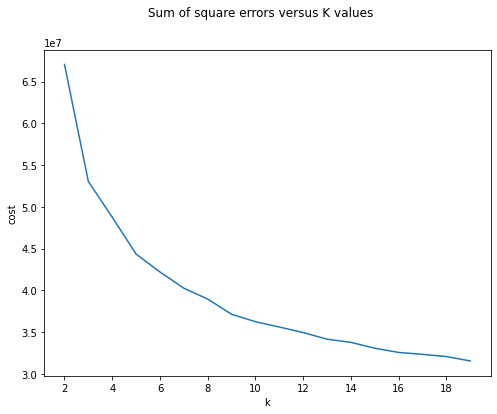

In [0]:
#To optimize k we cluster a fraction of the data for different choices of k and look for an "elbow" in the cost function.
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sbs
from matplotlib.ticker import MaxNLocator

'''
Code Reference: https://runawayhorse001.github.io/LearningApacheSpark/clustering.html
'''

#Plotting the elbow curve 
#Total within sum of squares VS the k value
fig, ax = plt.subplots(1,1, figsize =(8,6))
fig.suptitle("Sum of square errors versus K values")
ax.plot(range(2,20),cost[2:20])
ax.set_xlabel('k')
ax.set_ylabel('cost')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

#From this curve, the bend of the curve, accounting for the highest difference between adjacent totwss, and hence k = 8


### 2.2 K-Means

Could you tell out the optimized K value? 




****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to choose a K value as 8 and then summarize each cluster with the count on each Position_Group.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.2** In your report with proper section title  '2.2', Please summarize the following:     
    <ol>
        <li> What you could find from those clusters (by cluster central point)? </li>
        <li> Is there relationship between Position_Group and a particular Cluster?</li>
    </ol>

</div>
</div>




In [0]:
#Optimizing the k means clustering with k=8
from pyspark.ml.evaluation import ClusteringEvaluator

'''
Code Reference: https://www.bmc.com/blogs/python-spark-k-means-example/
'''

k = 8

 # Trains a k-means model with the optimized k number
kmeans1 = KMeans().setK(8).setSeed(1).setFeaturesCol("features")
model1 = kmeans1.fit(df_kmeans_)
centers = model1.clusterCenters()

#Once the training has converged we can print out the centroids of the 8 clusters.
print("Cluster Centers: ")
for center in centers:
    print(center)

#Assigning the individual rows to the nearest cluster centroid using transform method, 
#which adds 'prediction' column to the dataframe. The prediction value is an integer between 0 and k.
transformed_data = model1.transform(df_kmeans_)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(transformed_data)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Evaluate clustering.
cost_k8 = model.computeCost(df_kmeans_)
print("Within Set Sum of Squared Errors = " + str(cost_k8))

#selecting only the specific columns from transformed_data 
transformed = transformed_data.select('ID', 'Prediction')
rows = transformed.collect()
print(rows[:3])



Cluster Centers: 
[177.3317464   76.31794486  58.41639945  44.02061383  62.79111315
  67.3220339   42.5387082   61.02611086  52.17911131  46.79294549
  63.5510765   65.5758131   65.25240495  66.06596427  64.62757673
  66.20568026  64.10581768  62.28263857  70.52038479  73.82638571
  72.67384333  52.59688502  71.43426477  67.65048099  53.27072836
  57.47457627  48.97938617  64.57627119  66.67155291  68.96472744
  66.88914338]
[187.68026262  81.70680941  39.8684377   30.21252372  68.72675522
  59.71600253  31.19354839  44.54332701  34.72485769  33.42631246
  54.99114485  55.46110057  53.19481341  55.6059456   50.15876028
  62.97975965  50.6116382   51.14231499  68.34977862  64.29095509
  79.52941176  34.24351676  70.56799494  67.06388362  33.600253
  41.73561037  41.05566097  61.12903226  67.29411765  69.6116382
  66.76533839]
[172.46617578  73.21508518  65.18944637  68.70069204  57.79541522
  69.00043253  64.56055363  73.22923875  67.01859862  61.3399654
  60.86245675  72.86548443  76.2

In [0]:
#create a new dataframe using our SQL context
from pyspark.sql import SQLContext
sqlContext = SQLContext(spark)

df_pred = sqlContext.createDataFrame(rows)
df_pred.show()


#Joining the two dataframes df_pred and df_kmeans_new on the 'ID' column
df_kmeans_pred_ = df_pred.join(df_kmeans_new, 'ID')


#Changing the column name "Prediction" to "Cluster"
df_kmeans_pred_ = df_kmeans_pred_.withColumnRenamed('Prediction', 'Cluster')

df_kmeans_pred_.show(10)


+------+----------+
|    ID|Prediction|
+------+----------+
|158023|         2|
| 20801|         2|
|190871|         2|
|192985|         4|
|183277|         2|
|177003|         4|
|176580|         2|
|155862|         4|
|188545|         2|
|182521|         4|
|182493|         0|
|168542|         2|
|215914|         4|
|211110|         2|
|202126|         2|
|194765|         2|
|189511|         4|
|179813|         2|
|153079|         2|
|138956|         0|
+------+----------+
only showing top 20 rows

+------+-------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+--------------+
|    ID|Cluster|Height(CM)|Weight(KG)|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|Bal

+--------------+-------+-----+
|Position_Group|Cluster|count|
+--------------+-------+-----+
|           MID|      4| 1720|
|           MID|      1|  117|
|           MID|      7| 1141|
|           DEF|      5|    8|
|           MID|      0|  967|
|           DEF|      4|  599|
|           DEF|      3| 1266|
|           MID|      3|   77|
|           FWD|      2| 1112|
|           DEF|      0| 1230|
|           FWD|      3|    1|
|           FWD|      4|   71|
|           MID|      2| 1195|
|           DEF|      1| 1462|
|           FWD|      5|  535|
|           DEF|      2|    4|
|           FWD|      6| 1648|
|           FWD|      7|   38|
|           FWD|      0|   11|
|           MID|      5| 1486|
+--------------+-------+-----+
only showing top 20 rows



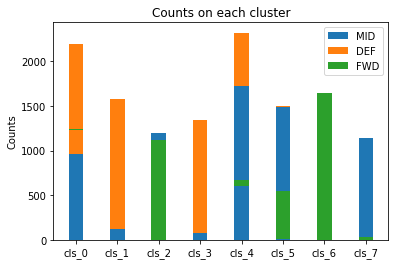

In [0]:
#Finding the counts of Position group under each cluster
count_on_clusters = df_kmeans_pred_.groupBy(['Position_Group','Cluster']).count()
count_on_clusters.show()

#Defining the cluster cordinates 
MID = np.array([967, 117, 1195, 77, 1720, 1486, 0, 1141])
DEF = np.array([1230, 1462, 4, 1266, 599, 8, 0, 0])
FWD = np.array([11,0,1112,1,71,535,1648,28])
ind = np.arange(len(MID))  # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

#Defining the bars
p1 = plt.bar(ind, MID, width)
p2 = plt.bar(ind, DEF, width,bottom=MID)
p3 = plt.bar(ind, FWD, width,bottom=DEF)


plt.ylabel('Counts')
plt.title('Counts on each cluster')
plt.xticks(ind, ('cls_0', 'cls_1', 'cls_2', 'cls_3', 'cls_4', 'cls_5', 'cls_6', 'cls_7'))
#plt.yticks(np.arange(0, 5000))
plt.legend((p1[0], p2[0], p3[0]), ('MID', 'DEF', 'FWD'))
plt.show()



## Part 3 - Supervised Learning: Classification on Position_Group

<a id="classification"></a>
***

In last part, you use the player's skill set values to segment the players into 8 clusters. Now we want to see whether we could accurately predict the position_group of the player.

*Remind: You must only use **PySpark** to complete the following data processing and model building. Otherwise, you lose all marks.*


### 3.1 Data Preparation

We remove the feature of position and only use the skill set features and the cluster results from Kmeans as the input (you need to create a column for your cluster results and name it as Cluster) for the model. Your target for classification is "Position_Group".

In [0]:
#define features column
FEATURES_COL_ = ['Height(CM)', 'Weight(KG)', 
                      'Crossing', 'Finishing', 'HeadingAccuracy', 
                      'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 
                      'Acceleration', 'SprintSpeed', 'Agility', 
                      'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                      'Stamina', 'Strength', 'LongShots', 'Aggression', 
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                      'Composure', 'Marking', 'StandingTackle', 'SlidingTackle','Cluster']

#initialise a vector assembler 
vecAssembler_ = VectorAssembler(inputCols=FEATURES_COL_, outputCol="features")
#transform df_kmeans_pred_
df_class_ = vecAssembler_.transform(df_kmeans_pred_).select('features','Position_Group')
#show top 3 classes
df_class_.show(3)

+--------------------+--------------+
|            features|Position_Group|
+--------------------+--------------+
|[173.736,72.12112...|           FWD|
|[188.976,83.00733...|           FWD|
|[179.832,68.0388,...|           FWD|
+--------------------+--------------+
only showing top 3 rows



In many data science modelling work, feature scaling is very important.
In here, we use standard scaling on the features.

In [0]:
#import required feature scaler library
from pyspark.ml.feature import StandardScaler
#define scaler
standardscaler=StandardScaler().setInputCol("features").setOutputCol("Scaled_features")
#fit data to scaler
raw_data=standardscaler.fit(df_class_).transform(df_class_)
#show first 5 data
raw_data.select("features","Scaled_features",'Position_Group').show(5)

+--------------------+--------------------+--------------+
|            features|     Scaled_features|Position_Group|
+--------------------+--------------------+--------------+
|[173.736,72.12112...|[12.9261363965246...|           FWD|
|[188.976,83.00733...|[14.0600080102548...|           FWD|
|[179.832,68.0388,...|[13.3796850420166...|           FWD|
|[155.7528,69.8531...|[11.5881678923229...|           MID|
|[176.784,73.93549...|[13.1529107192706...|           FWD|
+--------------------+--------------------+--------------+
only showing top 5 rows



In Spark, you could not use string as Target data type, Please encode the Position_Group column by using following encoding: 

FWD = 0
DEF = 1
MID = 2

*Hint: Data type after encoding should be numeric.*

In [0]:
#encode string data
raw_data_ = raw_data.withColumn('Target',when(col("Position_Group") == "DEF", 1)
      .when(col("Position_Group")== "FWD", 0)
      .otherwise(2))
#show first 5 encoded target data
raw_data_.show(5)

+--------------------+--------------+--------------------+------+
|            features|Position_Group|     Scaled_features|Target|
+--------------------+--------------+--------------------+------+
|[173.736,72.12112...|           FWD|[12.9261363965246...|     0|
|[188.976,83.00733...|           FWD|[14.0600080102548...|     0|
|[179.832,68.0388,...|           FWD|[13.3796850420166...|     0|
|[155.7528,69.8531...|           MID|[11.5881678923229...|     2|
|[176.784,73.93549...|           FWD|[13.1529107192706...|     0|
+--------------------+--------------+--------------------+------+
only showing top 5 rows



### 3.2 Training Test Evaluation

We remove the feature of position and use all other skill set features and the cluster results as the input for the model. The target for classification is "Position_Group".

Now, we split your data into train/Test, and evaluate one model's performance.

In [0]:
#split data set in proportion of 70% for training dataset and 30% for testing dataset
train, test = raw_data_.randomSplit([0.7, 0.3], seed=12)

In [0]:
#import required logistic regression library from pyspark
from pyspark.ml.classification import LogisticRegression
#define logistic regression model
lr = LogisticRegression(labelCol="Target", featuresCol="Scaled_features",maxIter=10)
#fit model to training data
model=lr.fit(train)

#perform predictions on test and train data
predict_train=model.transform(train)
predict_test=model.transform(test)
predict_test.select("Target","prediction").show(10)

+------+----------+
|Target|prediction|
+------+----------+
|     2|       2.0|
|     2|       2.0|
|     0|       0.0|
|     0|       0.0|
|     2|       2.0|
|     2|       2.0|
|     2|       1.0|
|     2|       2.0|
|     2|       2.0|
|     1|       2.0|
+------+----------+
only showing top 10 rows




****


<div class="alert alert-block alert-info">

**Code**: 
    You are required to evaluate the model by using confusion matrix. Please also print out your model's Precision, Recall and F1 score.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **3.2** In your report with proper section title  '3.2', Please summarize the following:     
    <ol>
        <li> The confusion matrix </li>
        <li> The Precision, Recall and F1 score</li>
    </ol>
</div>
</div>




In [0]:
#compute Confusion Matrix

'''
Code Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
'''

#import required confusion_matrix from sklearn library
from sklearn.metrics import confusion_matrix

#try-except block for error handling to prevent abnormal termination of code
try:
  #get the true and predicted position values and convert to list
  true_position = predict_test.select('Target').collect()
  predicted_position = predict_test.select('prediction').collect()
  #compute confusion matrix
  confusion_mat = confusion_matrix(true_position, predicted_position)
  #display confusion matrix
  print( 'The Confusion Matrix for the Logistic Regression Model:\n\n' + str(confusion_mat))

except Exception as e:
  logging.error(e)

The Confusion Matrix for the Logistic Regression Model:

[[ 821    7  210]
 [   2 1466  307]
 [ 194  240 1637]]


In [0]:
#compute Precision, Recall and F1 score

'''
Code Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
'''

#import required classification_report from sklearn library
from sklearn.metrics import classification_report

#try-except block for error handling to prevent abnormal termination of code
try:
  #compute classification report
  classification_rep = classification_report(true_position, predicted_position, target_names= ['FWD', 'DEF', 'MID'])
  #display classification report
  print( 'The Classification Report for the Logistic Regression Model:\n\n' + str(classification_rep))
except Exception as e:
  logging.error(e)


The Classification Report for the Logistic Regression Model:

              precision    recall  f1-score   support

         FWD       0.81      0.79      0.80      1038
         DEF       0.86      0.83      0.84      1775
         MID       0.76      0.79      0.77      2071

    accuracy                           0.80      4884
   macro avg       0.81      0.80      0.80      4884
weighted avg       0.80      0.80      0.80      4884



### 3.3 K-fold Cross-Validation

We surely missed something during the modelling work -- Hyper-parameter tuning! We can use K-fold cross validation to find out the best hyper-parameter set.

****


<div class="alert alert-block alert-info">

**Code**: 
    Please implement K-fold cross validation for three (any three) classification models.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **3.3** In your report with proper section title  '3.3', Please summarize the following:     
    <ol>
        <li> Your code design and running results </li>
        <li> Your findings on hyper-parameters based on this cross-validation results</li>
        <li> Any difficulties you had </li>
        <li> Any other possible tasks we could do on this dataset </li>
    </ol>
<b>Remind: fail to list the reference will lead a penalty and possibly plagiarism</b>    
</div>
</div>



In [0]:
#import required pyspark libraries
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

In [0]:
#K-fold (3-folds) cross validation for Logistic Regression Classifier

'''
Code Reference: https://benalexkeen.com/multiclass-text-classification-with-pyspark/
'''

#initialise multiclass classification evaluator based on accuracy metric
mult_class_evaluator = MulticlassClassificationEvaluator(labelCol= 'Target', predictionCol = 'prediction', 
                                                         metricName = 'accuracy')

#define pipeline
pipeline_logistiic_regression = Pipeline(stages= [lr])

#fit train data to pipeline
pipeline_logistiic_regression_model = pipeline_logistiic_regression.fit(train)

#set hyper parameter grid
hyper_parameter_grid_logistic_regression = (ParamGridBuilder()\
                                            .addGrid(lr.regParam, [0.01, 0.1, 0.5])\
                                            .addGrid(lr.maxIter, [10,20,50])\
                                            .addGrid(lr.elasticNetParam, [0.0, 0.5, 0.8])\
                                            .addGrid(lr.aggregationDepth, [2, 5, 10])\
                                            .addGrid(lr.threshold, [0.1, 0.5, 0.9])\
                                            .build())

#try-except block for error handling to prevent abnormal termination of code
try:
  #initialise cross validator with k = 3
  cross_validator_pipeline_logistic_regression = CrossValidator(estimator = pipeline_logistiic_regression,
                                                       estimatorParamMaps = hyper_parameter_grid_logistic_regression, 
                                                       evaluator = mult_class_evaluator, numFolds = 3)
  #fit cross validator on training data
  cross_validating_pipeline_logistic_regression_model = cross_validator_pipeline_logistic_regression.fit(train)

  #get the best pipeline  regression model used from the best hyper-parameters used
  best_model_pipeline_logistic_regression = cross_validating_pipeline_logistic_regression_model.bestModel

  #get the logistic regression model from the best pipeline model
  best_model_logistic_regression = best_model_pipeline_logistic_regression.stages[0]

  #find the best hyperparameters used 
  print('The best hyper-parameters for tuning this Logistic Regression Model are:\n\n' + str(best_model_logistic_regression.extractParamMap()))

  #use cross-validated best model for predictions
  predictions_using_logistic_regression = best_model_pipeline_logistic_regression.transform(test)

  #evaluate initial model
  print('\n\nAccuracy of initial Logistic Regression Model: ' + str(mult_class_evaluator.evaluate(predict_test)))
  #evaluate cross validated model
  print('\n\nAccuracy of cross validated final Logistic Regression Model: ' + str(mult_class_evaluator.evaluate(predictions_using_logistic_regression)))

except Exception as e:
  logging.error(e)

The best hyper-parameters for tuning this Logistic Regression Model are:

{Param(parent='LogisticRegression_72ffce54faac', name='aggregationDepth', doc='suggested depth for treeAggregate (>= 2)'): 2, Param(parent='LogisticRegression_72ffce54faac', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty'): 0.0, Param(parent='LogisticRegression_72ffce54faac', name='family', doc='The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial.'): 'auto', Param(parent='LogisticRegression_72ffce54faac', name='featuresCol', doc='features column name'): 'Scaled_features', Param(parent='LogisticRegression_72ffce54faac', name='fitIntercept', doc='whether to fit an intercept term'): True, Param(parent='LogisticRegression_72ffce54faac', name='labelCol', doc='label column name'): 'Target', Param(parent='LogisticRegression

In [0]:
#K-fold (3-folds) cross validation for Random Forest Classifier

'''
Code Reference: 
1. https://benalexkeen.com/multiclass-text-classification-with-pyspark/
2. https://spark.apache.org/docs/latest/ml-classification-regression.html#random-forest-classifier
'''

try:
  #define random forest classifier
  random_forest_classifier = RandomForestClassifier(labelCol="Target", featuresCol="Scaled_features")
  #fit training dataset random tree classifier 
  initial_random_forest_model = random_forest_classifier.fit(train)
  predict_initial_random_forest = initial_random_forest_model.transform(test)
except Exception as e:
  logging.error(e)

hyper_parameter_grid_random_forest_classifier = (ParamGridBuilder()\
                                                 .addGrid(random_forest_classifier.cacheNodeIds, [True, False])\
                                                 .addGrid(random_forest_classifier.checkpointInterval, [1, 5, 10])\
                                                 .addGrid(random_forest_classifier.impurity, ['gini', 'entropy'])\
                                                 .addGrid(random_forest_classifier.maxDepth, [1, 5, 10])\
                                                 .addGrid(random_forest_classifier.subsamplingRate, [0.1, 0.5, 1.0])\
                                                 .addGrid(random_forest_classifier.minInstancesPerNode, [1, 5, 10])\
                                                 .build())

#try-except block for error handling to prevent abnormal termination of code
try:
  #initialise cross validator with k = 3
  cross_validator_random_forest_classifier = CrossValidator(estimator = random_forest_classifier, estimatorParamMaps = hyper_parameter_grid_random_forest_classifier, 
                                                            evaluator = mult_class_evaluator, numFolds = 3)
  #fit cross validator on training data
  cross_validating_random_forest_classifier = cross_validator_random_forest_classifier.fit(train)

  #get the best random forest model used from the best hyper-parameters used
  best_model_random_forest_classifier = cross_validating_random_forest_classifier.bestModel

  #find the best hyperparameters used 
  print('The best hyper-parameters for tuning this Random Forest Cross Validated Model are:\n\n' + str(best_model_random_forest_classifier.extractParamMap()))

  #use cross-validated best model for predictions
  predictions_using_random_forest_classifier = best_model_random_forest_classifier.transform(test)
  
  #evaluate initial model
  print('\n\nAccuracy of initial Random Forest Model: ' + str(mult_class_evaluator.evaluate(predict_initial_random_forest)))
  #evaluate cross validated model
  print('\n\nAccuracy of cross validated final Random Forest Model: ' + str(mult_class_evaluator.evaluate(predictions_using_random_forest_classifier)))

except Exception as e:
  logging.error(e)

The best hyper-parameters for tuning this Random Forest Cross Validated Model are:

{Param(parent='RandomForestClassifier_c44848e4c340', name='cacheNodeIds', doc='If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees.'): True, Param(parent='RandomForestClassifier_c44848e4c340', name='checkpointInterval', doc='set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext'): 1, Param(parent='RandomForestClassifier_c44848e4c340', name='featureSubsetStrategy', doc='The number of features to consider for splits at each tree node. Supported options: auto, all, onethird, sqrt, log2, (0.0-1.0], [1-n].'): 'auto', Param(parent='RandomForestClassifier_c44848e4c340', name='featuresCol', doc='features c

In [0]:
#K-fold (3-folds) cross validation for Decision Tree Classifier

'''
Code References:
1. https://benalexkeen.com/multiclass-text-classification-with-pyspark/
2. https://spark.apache.org/docs/latest/ml-classification-regression.html#decision-trees
'''

try:
  #define random forest classifier
  decision_tree_classifier = DecisionTreeClassifier(labelCol="Target", featuresCol="Scaled_features")
  #fit training dataset random tree classifier 
  initial_decision_tree_model = decision_tree_classifier.fit(train)
  predict_initial_decision_tree = initial_decision_tree_model.transform(test)
except Exception as e:
  logging.error(e)

hyper_parameter_grid_decision_tree_classifier = (ParamGridBuilder()\
                                                 .addGrid(decision_tree_classifier.cacheNodeIds, [True, False])\
                                                 .addGrid(decision_tree_classifier.checkpointInterval, [1, 5, 10])\
                                                 .addGrid(decision_tree_classifier.impurity, ['gini', 'entropy'])\
                                                 .addGrid(decision_tree_classifier.maxBins, [20, 32, 40])\
                                                 .addGrid(decision_tree_classifier.minInstancesPerNode, [1, 5, 10])\
                                                 .build())

#try-except block for error handling to prevent abnormal termination of code
try:
  #initialise cross validator with k = 3
  cross_validator_decision_tree_classifier = CrossValidator(estimator = decision_tree_classifier, estimatorParamMaps = hyper_parameter_grid_decision_tree_classifier, 
                                                            evaluator = mult_class_evaluator, numFolds = 3)
  #fit cross validator on training data
  cross_validating_decision_tree_classifier = cross_validator_decision_tree_classifier.fit(train)

  #get the best logistic regression model used from the best hyper-parameters used
  best_model_decision_tree_classifier = cross_validating_decision_tree_classifier.bestModel

  #find the best hyperparameters used 
  print('The best hyper-parameters for tuning this Decision Tree Cross Validated Model are:\n\n' + str(best_model_decision_tree_classifier.extractParamMap()))

  #use cross-validated best model for predictions
  predictions_using_decision_tree_classifier = best_model_decision_tree_classifier.transform(test)

  #evaluate initial model
  print('\n\nAccuracy of initial Decision Tree Model: ' + str(mult_class_evaluator.evaluate(predict_initial_random_forest)))
  #evaluate cross validated model
  print('\n\nAccuracy of cross validated final Decision Tree Model: ' + str(mult_class_evaluator.evaluate(predictions_using_decision_tree_classifier)))

except Exception as e:
  logging.error(e)

The best hyper-parameters for tuning this Decision Tree Cross Validated Model are:

{Param(parent='DecisionTreeClassifier_f788b69f7554', name='cacheNodeIds', doc='If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees.'): True, Param(parent='DecisionTreeClassifier_f788b69f7554', name='checkpointInterval', doc='set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext'): 1, Param(parent='DecisionTreeClassifier_f788b69f7554', name='featuresCol', doc='features column name'): 'Scaled_features', Param(parent='DecisionTreeClassifier_f788b69f7554', name='impurity', doc='Criterion used for information gain calculation (case-insensitive). Supported options: entropy, gini'): 'gini', Param(parent='

In [0]:
#Additional Task 3.3
'''
Code References:
1. https://stackoverflow.com/questions/41775281/filtering-a-pyspark-dataframe-using-isin-by-exclusion
2. https://stackoverflow.com/questions/41775281/filtering-a-pyspark-dataframe-using-isin-by-exclusion 
3. https://spark.apache.org/docs/2.2.0/ml-clustering.html#output-columns
'''
#Cluster the potential based on selected features 

#Label encoding the column "Potential"
high = list(range(86,101))
middle = list(range (71, 86))
low = list(range(56, 71))
very_low = list(range(45,56))


#Create a new column titled "Potential_Grading", after labelling 
df_new = df.withColumn("Potential_Grading", when(col("Potential").isin(high), "high").
                    when(col("Potential").isin(middle), "Middle").
                    when(col("Potential").isin(low), "Low").
                    when(col("Potential").isin(very_low),"Verylow").otherwise("None"))

#Select the features 
df_kmeans = df_new.select("ID","Height(CM)","Weight(KG)", "Crossing", "Finishing", "HeadingAccuracy", "ShortPassing", 
          "Volleys", "Dribbling", "Curve", "FKAccuracy", "LongPassing", "BallControl", "Acceleration", 
          "SprintSpeed", "Agility", "Reactions", "Balance", "ShotPower", "Jumping", "Stamina", "Strength", 
          "LongShots", "Aggression", "Interceptions", "Positioning", "Vision", "Penalties", "Composure", 
          "Marking", "StandingTackle", "SlidingTackle","Potential_Grading")

#Features to vectorize
FEATURES_COL1 = ["Height(CM)","Weight(KG)", "Crossing", "Finishing", "HeadingAccuracy", "ShortPassing", 
          "Volleys", "Dribbling", "Curve", "FKAccuracy", "LongPassing", "BallControl", "Acceleration", 
          "SprintSpeed", "Agility", "Reactions", "Balance", "ShotPower", "Jumping", "Stamina", "Strength", 
          "LongShots", "Aggression", "Interceptions", "Positioning", "Vision", "Penalties", "Composure", 
          "Marking", "StandingTackle", "SlidingTackle"]


In [0]:
vecAssembler = VectorAssembler(inputCols=FEATURES_COL1, outputCol="features")
df_kmeans_1 = vecAssembler.setHandleInvalid("skip").transform(df_kmeans).select('ID','features')
df_kmeans_1.show(10)

+------+--------------------+
|    ID|            features|
+------+--------------------+
|158023|[173.736,72.12112...|
| 20801|[188.976,83.00733...|
|190871|[179.832,68.0388,...|
|193080|[195.072,76.20345...|
|192985|[155.7528,69.8531...|
|183277|[176.784,73.93549...|
|177003|[176.784,66.22443...|
|176580|[182.88,86.18248,...|
|155862|[182.88,82.100152...|
|200389|[188.976,87.08966...|
+------+--------------------+
only showing top 10 rows



In [0]:
from pyspark.ml.evaluation import ClusteringEvaluator
import numpy as np

cost = np.zeros(21)

for k in range(2,21):

  # Trains a k-means model.
  kmeans = KMeans().setK(k).setFeaturesCol("features").setSeed(1)
  model1 = kmeans.fit(df_kmeans_1)  
  
  #Evaluate clustering by computing Within Set Sum of Squared Errors.
  cost[k] = model1.computeCost(df_kmeans_1)
  print("Within Set Sum of Squared Errors = " + str(cost[k]))

Within Set Sum of Squared Errors = 96105064.60212262
Within Set Sum of Squared Errors = 70977840.56023589
Within Set Sum of Squared Errors = 56986430.25938559
Within Set Sum of Squared Errors = 51938261.5205192
Within Set Sum of Squared Errors = 51121245.35777758
Within Set Sum of Squared Errors = 46108218.79285382
Within Set Sum of Squared Errors = 44120622.41885962
Within Set Sum of Squared Errors = 42750291.30550195
Within Set Sum of Squared Errors = 41395828.04177585
Within Set Sum of Squared Errors = 40186855.237596534
Within Set Sum of Squared Errors = 40047169.02347867
Within Set Sum of Squared Errors = 39288050.27612305
Within Set Sum of Squared Errors = 37979258.94868156
Within Set Sum of Squared Errors = 38700378.03173219
Within Set Sum of Squared Errors = 36710610.0937119
Within Set Sum of Squared Errors = 36354748.63809524
Within Set Sum of Squared Errors = 35877052.91985504
Within Set Sum of Squared Errors = 35417847.719818234
Within Set Sum of Squared Errors = 35229134.95

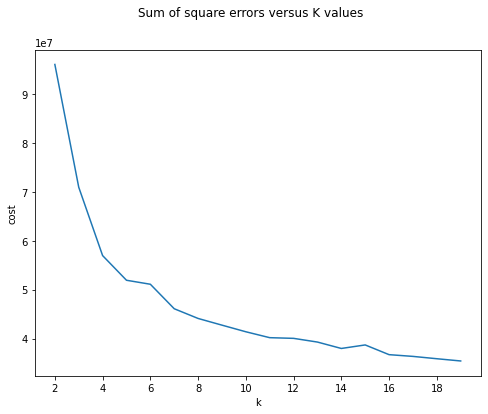

In [0]:
fig, ax = plt.subplots(1,1, figsize =(8,6))
fig.suptitle("Sum of square errors versus K values")
ax.plot(range(2,20),cost[2:20])
ax.set_xlabel('k')
ax.set_ylabel('cost')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()



#from the elbow curve, the optimum number of clusters is at K = 8

In [0]:
k = 8

# Trains a k-means model with the optimized k number
kmeans1 = KMeans().setK(8).setSeed(1).setFeaturesCol("features")
model1 = kmeans1.fit(df_kmeans_1)
centers = model1.clusterCenters()

#Once the training has converged we can print out the centroids of the 8 clusters.
print("Cluster Centers: ")
for center in centers:
    print(center)


#Assigning the individual rows to the nearest cluster centroid using transform method, 
#which adds 'prediction' column to the dataframe. The prediction value is an integer between 0 and k.
transformed_data = model1.transform(df_kmeans_1)


#selecting only the specific columns from transformed_data 
transformed = transformed_data.select('ID', 'Prediction')
rows1 = transformed.collect()
print(rows1[:3])

Cluster Centers: 
[173.16573221  74.26820837  65.96571798  56.0126132   59.44987063
  71.82729625  54.85316947  68.57988357  64.30142303  59.61513583
  68.41364812  71.17723157  68.73673997  68.20601552  70.46248383
  69.21377749  69.87871928  69.82956016  68.35834411  75.41073739
  68.6335705   64.35187581  70.04269082  67.09637775  63.29754204
  66.71216041  57.86287193  68.52199224  64.83117723  67.69663648
  64.89294955]
[171.23633463  72.5396426   56.43738259  40.53882279  53.7658109
  62.66092674  38.17376331  59.51721979  47.38290545  41.67313713
  57.53350031  61.63494051  69.56261741  69.39949906  67.51221039
  60.22761428  68.99624296  52.98998121  66.58547276  70.44364433
  64.05291171  44.78083907  62.72667502  59.79398873  51.79805886
  53.08015028  44.71916093  56.53600501  59.2946149   62.27739512
  60.56981841]
[172.3479005   73.11284505  65.2392562   68.49380165  57.4322314
  68.99545455  64.36570248  73.1731405   67.00247934  61.41942149
  60.98099174  72.79628099  76

In [0]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(spark)

df_pred_1 = sqlContext.createDataFrame(rows1)
df_pred_1.show()


#Joining the two dataframes df_pred and df_kmeans_new on the 'ID' column
df_kmeans_pred_1 = df_pred_1.join(df_kmeans, 'ID')


#Changing the column name "Prediction" to "Cluster"
df_kmeans_pred_1 = df_kmeans_pred_1.withColumnRenamed('Prediction', 'Clusters')

df_kmeans_pred_1.show(10)

+------+----------+
|    ID|Prediction|
+------+----------+
|158023|         2|
| 20801|         2|
|190871|         2|
|193080|         3|
|192985|         0|
|183277|         2|
|177003|         0|
|176580|         2|
|155862|         0|
|200389|         3|
|188545|         2|
|182521|         0|
|182493|         4|
|168542|         2|
|215914|         0|
|211110|         2|
|202126|         2|
|194765|         2|
|192448|         3|
|192119|         3|
+------+----------+
only showing top 20 rows

+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+-----------------+
|    ID|Clusters|Height(CM)|Weight(KG)|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassin

In [0]:
count_on_clusters1 = df_kmeans_pred_1.groupBy(['Potential_Grading','Clusters']).count()
count_on_clusters1.show()

+-----------------+--------+-----+
|Potential_Grading|Clusters|count|
+-----------------+--------+-----+
|             high|       6|    2|
|           Middle|       2| 1683|
|              Low|       5| 1147|
|          Verylow|       3|   13|
|          Verylow|       5|    8|
|           Middle|       1| 1352|
|           Middle|       7|  769|
|           Middle|       4| 1024|
|              Low|       4|  613|
|          Verylow|       4|    1|
|              Low|       1| 1832|
|             high|       5|    6|
|           Middle|       5|  948|
|             high|       2|   98|
|              Low|       6| 1198|
|              Low|       0|  913|
|             high|       3|   25|
|           Middle|       6|  630|
|           Middle|       3|  843|
|          Verylow|       7|    4|
+-----------------+--------+-----+
only showing top 20 rows



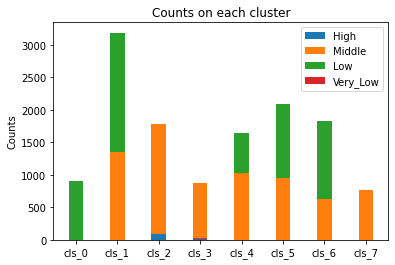

In [0]:
#Visualise the count on different position groups 
#high, middle, low, very_low.

cl_0 = (0,0,913,0)
cl_1 = (0,1352, 1832,0)
cl_2 = (98,1683,0,0)
cl_3 = (25,843, 0,13)
cl_4 = (0,1024,613,1)
cl_5 = (6,948, 1147,8)
cl_6 = (2, 630, 1198,0)
cl_7 = (0,769, 0,4)

#Defining the cluster cordinates 
High = np.array([0,0,98,25,0,6,2,0])
Middle = np.array([0,1352,1683,843,1024,948,630,769])
Low = np.array([913,1832,0,0,613,1147,1198,0])
Very_Low = np.array([0,0,0,13,1,8,0,4])
ind = np.arange(len(High))  # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

#Defining the bars
p1 = plt.bar(ind, High, width)
p2 = plt.bar(ind, Middle, width, bottom=High)
p3 = plt.bar(ind, Low, width, bottom=Middle)
p4 = plt.bar(ind, Very_Low, width, bottom=Low)


plt.ylabel('Counts')
plt.title('Counts on each cluster')
plt.xticks(ind, ('cls_0', 'cls_1', 'cls_2', 'cls_3', 'cls_4', 'cls_5', 'cls_6', 'cls_7'))
#plt.yticks(np.arange(0, 5000))
plt.legend((p1[0], p2[0], p3[0],p4[0]), ('High','Middle','Low', 'Very_Low'))
plt.show()